# [Chapter 7](https://learning.oreilly.com/library/view/python-machine-learning/9781119545637/c07.xhtml): Supervised Learning - Classification using Logistic Regression

> ![](https://learning.oreilly.com/covers/urn:orm:book:9781119545637/200w/)

> [*Python Machine Learning*](https://learning.oreilly.com/library/view/python-machine-learning/9781119545637/), W.-M. Lee, 2019, Wiley.

# Logit Function

*Odds* are defined as the ratio of the probability of success to the probability of failure. Given $P$ as the probability of success, then the odds are

$$\frac{P}{(1-P)}$$

When you apply the natural logarithm to the odds, you get the <mark>*logit function*</mark>. The logit function, $L$, is the logarithm of the odds.

$$L = \ln \left( \frac{P}{(1-P)} \right)$$

Text(0, 0.5, 'Logit - L')

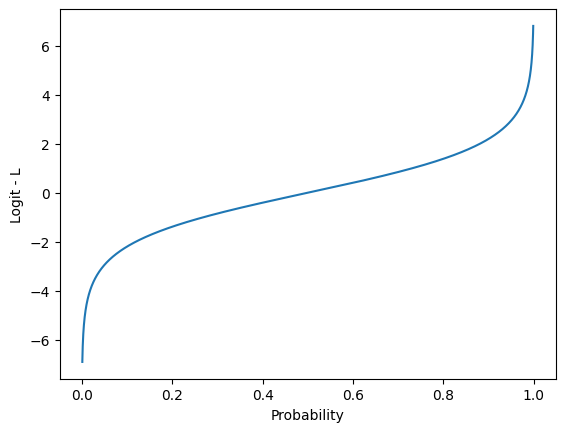

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def logit(x):
    return np.log( x / (1 - x) )

x = np.arange(0.001,0.999, 0.0001)
y = [logit(n) for n in x]
plt.plot(x,y)
plt.xlabel("Probability")
plt.ylabel("Logit - L")

## Sigmoid Curve

Note that the $x$-axis for the logit curve is the probability and the $y$-axis is the real-number range. For logistic regression, we need to swap these axes - flipping the axes results in the *sigmoid curve*.

The sigmoid curve is obtained using the <mark>*Sigmoid function*</mark>, which is the inverse of the logit function:

$$P = \frac{1}{1+e^{-(L)}}$$

Given a value $L \in (-\infty,\infty)$, the sigmoid function returns a probability in $(0,1)$.

Text(0, 0.5, 'Probability')

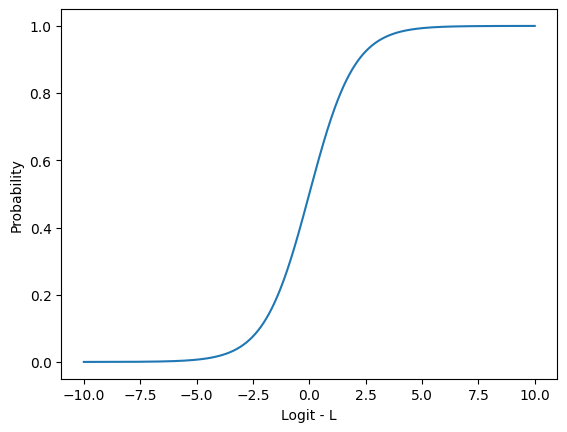

In [ ]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")

# Using the Breast Cancer Wisconsin (Diagnostic) Data

For additional information on this dataset, check out the [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) ...

## Examining the Relationship Between Features

In [ ]:
from sklearn.datasets import load_breast_cancer

# Instantiate a Bunch object
cancer = load_breast_cancer()

# Print some information about the dataset
print('cancer:', type(cancer)) # print the class
print()
print(cancer.DESCR)

cancer: <class 'sklearn.utils._bunch.Bunch'>

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30

In [ ]:
print('\ncancer.target_names')
print(cancer.target_names)
print('\ncancer.target')
print(cancer.target)


cancer.target_names
['malignant' 'benign']

cancer.target
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 

Confirm that `0` = Malignant and `1` = Benign:

In [ ]:
print('sum of cancer.target =', sum(cancer.target))

sum of cancer.target = 357


## Plotting the Features in 2D

In [ ]:
# First, preprocess the dataset

from sklearn.datasets import load_breast_cancer

# Instantiate a Bunch object
cancer = load_breast_cancer()

#---copy from dataset into a 2-d list---
X = []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)):              # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture

# Print some information about the list X
print('X:', type(X)) # print the class
print(f'X[0=malignant] is {len(X[0])}x{len(X[0][0])}')
print(f'X[1=benign]    is {len(X[1])}x{len(X[1][1])}')

X: <class 'list'>
X[0=malignant] is 2x212
X[1=benign]    is 2x357


### via matplotlib ...

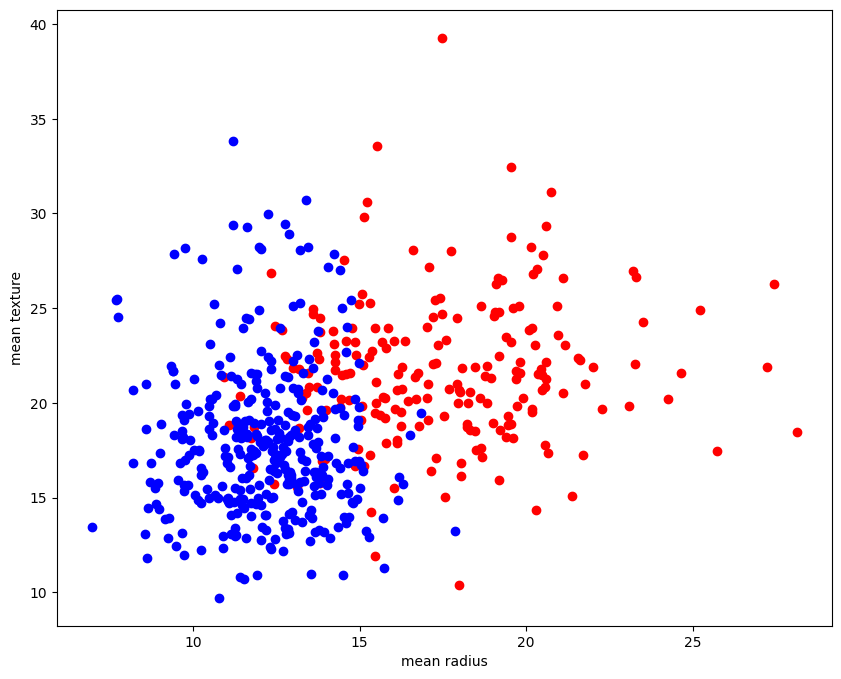

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# See https://matplotlib.org/stable/api/pyplot_summary.html

from sklearn.datasets import load_breast_cancer

# df = load_breast_cancer(return_X_y=False, as_frame=True) # available in v.0.23
# print(df.columns)

colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

### via plotly ...

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

# Print some information about the dataframe
print(df.describe)
print(df['target'].value_counts())

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

In [ ]:
import plotly.express as px

fig = px.scatter(data_frame=df[['mean radius','mean texture','target']],
                 x='mean radius', y='mean texture',
                 template='plotly_dark',
                 color='target',
                 symbol='target'
                 )

fig.show()

### via bokeh ...

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

TOOLTIPS = [
    ("(x,y)", "mean radius=$x{0.00}, mean texture=$y{0.00}"),
]

# Generate canvas
fig = figure(title='Mean radius x mean texture from the cancer dataset',
             x_axis_label='mean_radius',
             y_axis_label='mean_texture',
             tooltips=TOOLTIPS,
             width=600,
             height=400)

# Draw the scatter plot for benign (filter on target==1)
dfBenign = df.query('target==1')
fig.circle(x=dfBenign['mean radius'], y=dfBenign['mean texture'],
           size=5, color="blue")

# Draw the scatter plot for malignant (filter on target==0)
fig.circle(x=df.query('target==0')['mean radius'],
           y=df.query('target==0')['mean texture'],
           size=5, color="red")

show(fig)

## Plotting in 3D

### via matplotlib ...

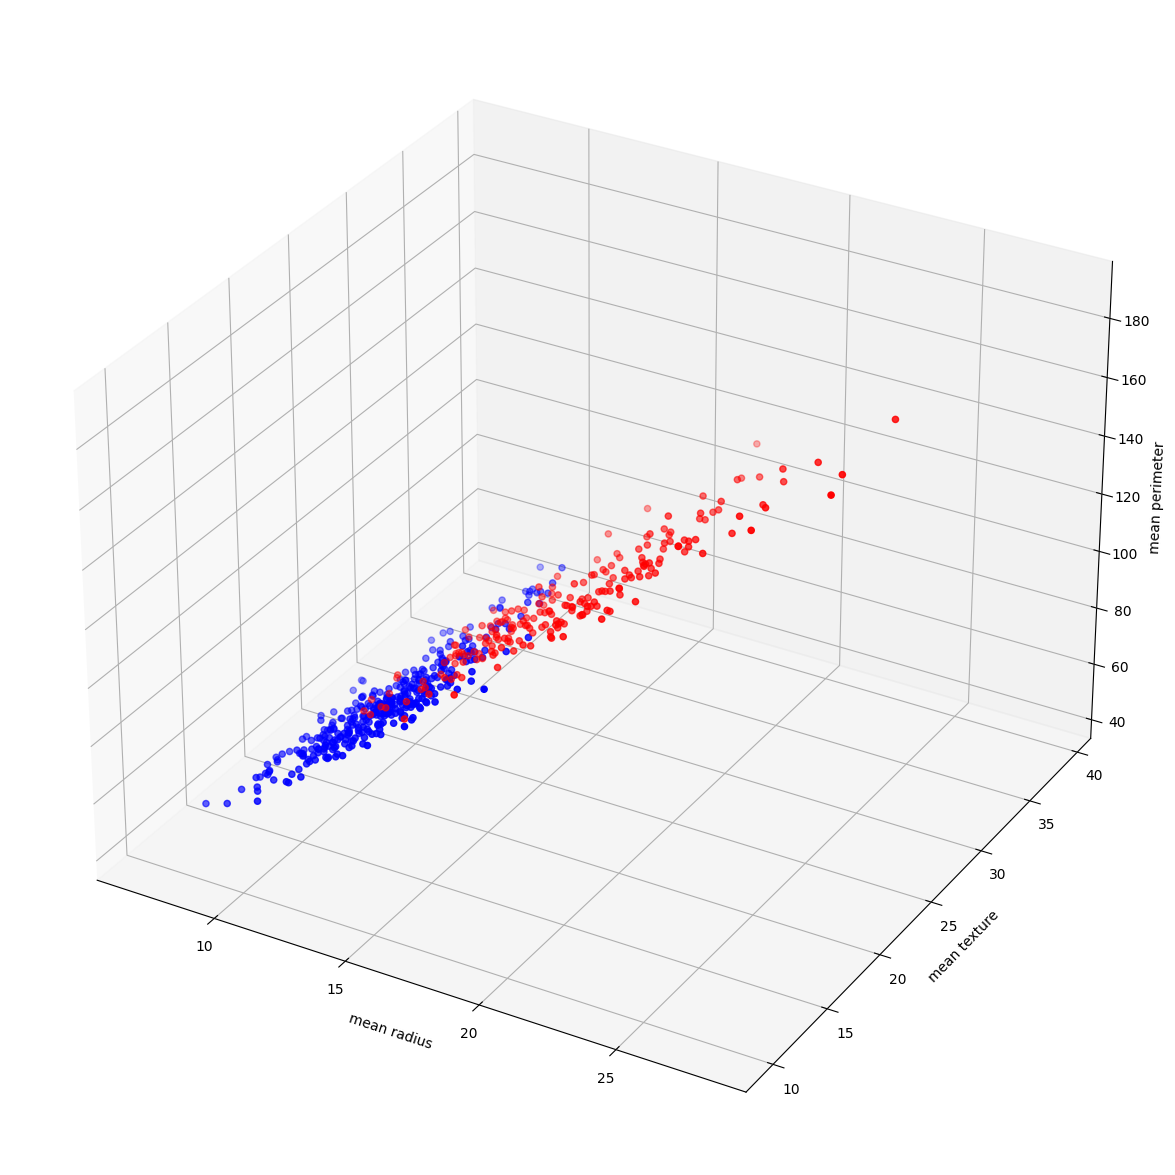

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)):    # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])

colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

### via plotly ...

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

import plotly.express as px

fig = px.scatter_3d(data_frame=df[['mean radius','mean texture',
                                   'mean perimeter','target']],
                 x='mean radius', y='mean texture', z='mean perimeter',
                 title='mean radius x mean texture x mean perimeter from cancer dataset',
                 template='plotly_dark',
                 color='target',
                 symbol='target'
                 )

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()

# Exercises
---

1. Try the above in a python file.

## Training Using One Feature

We will use logistic regression to try to predict if a tumor is cancerous.

<ipython-input-13-51dd4cddf41e>:13: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



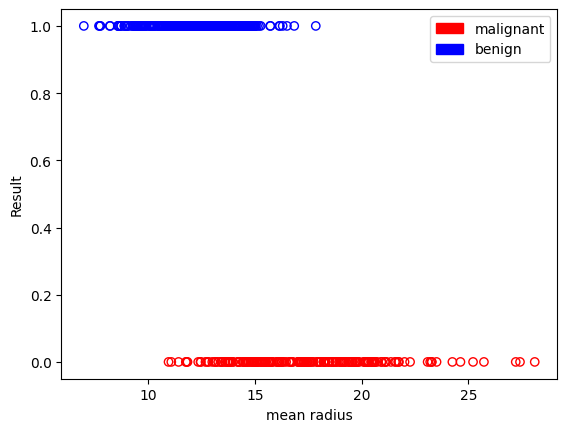

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()   # Load dataset
x = cancer.data[:,0]            # mean radius (first column)
y = cancer.target               # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'}    # 0: malignant, 1: benign

plt.scatter(x,y,
            facecolors='none', # circles are not filled
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Result")

# See https://matplotlib.org/stable/api/patches_api.html
red   = mpatches.Patch(color='red',   label='malignant')
blue  = mpatches.Patch(color='blue',  label='benign')

plt.legend(handles=[red, blue], loc=1) # upper right

### Finding the Intercept and Coefficient

In [ ]:
from sklearn import linear_model
import numpy as np

log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),
                y = y)

# Get the hyperparameters for this estimator
params = log_regress.get_params()
print('Model hyperparameters:', params)
print()

#---print trained model intercept---
print('Intercept:', log_regress.intercept_) # [ 8.19393897]

#---print trained model coefficients---
print('Coefficient(s):', log_regress.coef_) # [[-0.54291739]]

# NOTE: The actual values and those expected by the textbook are different!

Model hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Intercept: [15.120902]
Coefficient(s): [[-1.02475609]]


### Plotting the Sigmoid Curve

Given the model intercept $\beta_0$ and the model coefficient $\beta_1$, then the sigmoid curve for the <mark>model equation</mark> can be derived using the sigmoid function

$$Prob(x) = \frac{1}{1+e^{-(\beta_0+\beta_1{x})}}$$

Notice that this is the same equation for the sigmoid curve we saw earlier, except we are replacing $L$ with an equation based on the models *intercept* and *coefficient*(s).

So the model equation for the example above is

$$Prob(x) = \frac{1}{1+e^{-(15.12-1.02{x})}}$$

where $x$ is the _mean radius_ and $Prob(x)$ is the probability that the mass is benign.


<ipython-input-15-e3c929e100f8>:9: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



Text(0, 0.5, 'Probability (benign)')

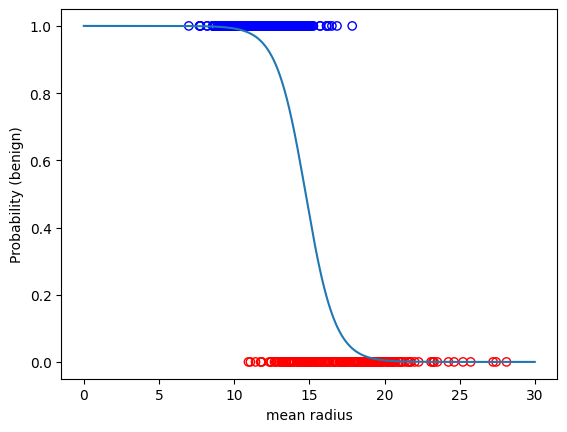

In [ ]:
def sigmoid(x):
    return (1 / (1 +
        np.exp(-(log_regress.intercept_[0] +
        (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x,y,
    facecolors='none',
    edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
    cmap=colors)

plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability (benign)")

### Making Predictions

**Note:** It appears some sklearn updates may have generated issues with the original code from the author ...

In [ ]:
testArr=np.array([[20]]) # transform scalar value to a 2D array
print(testArr)
print(testArr.shape)
print()

print(log_regress.predict_proba(testArr)) # [[0.93489354 0.06510646]] for ['malignant','benign']
print(log_regress.predict(testArr)[0])    # returns 0 for 'malignant' since higher probability

[[20]]
(1, 1)

[[0.99538685 0.00461315]]
0


Hence, given a *mean radius* of 20 the model predicts the classification to be malignant (probability of $0.995$) or benign (probability of $0.005$). Using the default *threshold* of $0.50$, the prediction is that the tumor is malignant (value of 0).

In [ ]:
testArr=np.array([[8]]) # transform scalar value to a 2D array
print(testArr)
print(testArr.shape)
print()

print(log_regress.predict_proba(testArr))  # [[0.02082411 0.97917589]] for ['malignant','benign']
print(log_regress.predict(testArr)[0])     # returns 1 for 'benign'

[[8]]
(1, 1)

[[9.84046071e-04 9.99015954e-01]]
1


Hence, given a *mean radius* of 8 the model predicts the classification to be malignant (probability of $0.001$) or benign (probability of $0.999$). Using the default *threshold* of $0.50$, the prediction is that the tumor is benign (value of 1).

## Training the Model Using All Features

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()        # Load dataset

Split the dataset into a 75% training set and 25% test set, and *stratify* to ensure the split is proportionate with respect to the target.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              cancer.data,               # features
                              cancer.target,             # labels
                              test_size = 0.25,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = cancer.target)  # randomize based on labels

In [ ]:
print(len(train_set), len(test_set))

426 143


Train the model using a *LogisticRegression* estimator.

In [ ]:
from sklearn import linear_model
x = train_set[:,0:30]         # use 30 attributes
y = train_labels              # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,
                y = y)

# Get the hyperparameters for this estimator
params = log_regress.get_params()
print('Model hyperparameters:', params)

Model hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Note:** For additional information on `lbfgs` solvers, see https://en.wikipedia.org/wiki/Limited-memory_BFGS

In [ ]:
# Display the model parameters

print(log_regress.intercept_)
print(log_regress.coef_)

[0.10277949]
[[ 0.5844612   0.52342016  0.51305013 -0.03121987 -0.01611099 -0.09080365
  -0.12870478 -0.05096804 -0.02957876 -0.00430479  0.02718268  0.13771429
   0.02726314 -0.11054188 -0.00142629 -0.02146372 -0.02938366 -0.00683036
  -0.00555795 -0.00205115  0.67665368 -0.57068549 -0.30919133 -0.00672371
  -0.03257438 -0.30727354 -0.38677455 -0.10422661 -0.08803816 -0.02870834]]


Note that since we are using all 30 features in this model, there are 30 coefficients generated. The model equation will be a complicated one based on these 30 features!

So, using all features, the sigmoid curve for the <mark>model equation</mark> is:

$$\textit{Prob}(x_1, x_2, x_3, \ldots, x_{30}) ~~=~~
    \frac{1}{1 + e^{~p}}
$$
where
$$
\begin{align*}
 p &~~=~~ \beta_0 + x_1\beta_1+ x_2\beta_2+ x_3\beta_3
            + \cdots + x_30\beta_30\\
   &~~=~~ 0.10277 + x_1 0.58446 + x_2 0.52342 +
            + \cdots - x_{30} 0.02870
\end{align*}
$$
and where each $x_i$ corresponds to the following attributes, in order:

In [ ]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Testing the Model

In [ ]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels and convert into a dataframe---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---get the actual diagnosis and convert into a dataframe---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result)

     Malignant        Benign  Prediction  Original Result
0     0.999837  1.630691e-04           0                0
1     0.999748  2.518486e-04           0                0
2     0.173488  8.265124e-01           1                1
3     1.000000  5.658321e-09           0                0
4     0.089217  9.107834e-01           1                0
..         ...           ...         ...              ...
138   0.003429  9.965706e-01           1                1
139   0.024513  9.754871e-01           1                1
140   1.000000  2.735457e-17           0                0
141   1.000000  1.353108e-07           0                0
142   0.000069  9.999306e-01           1                1

[143 rows x 4 columns]


### Getting the Confusion Matrix

A type of error matrix commonly used in evaluating a supervised learning ML classification algorithm is the [*confusion matrix*](https://en.wikipedia.org/wiki/Confusion_matrix).

#### Method 1: Using the pandas crosstab() function


In [ ]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   4
1       5  86


#### Method 2: Using the confusion_matrix() function from the sklearn metrics module

In [ ]:
from sklearn import metrics

#---view the confusion matrix---
cf_matrix=metrics.confusion_matrix(
    y_true = test_labels,  # True labels
    y_pred = preds         # Predicted labels
)
print(cf_matrix)

[[48  5]
 [ 4 86]]


We can generate a *heat map* for the confusion matrix (the proportions of each quadrant determine the color):

<Axes: >

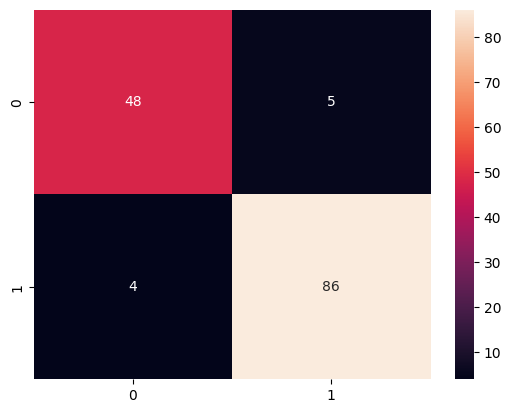

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Alternately, if you want the quadrants showing the percentages ...

<Axes: >

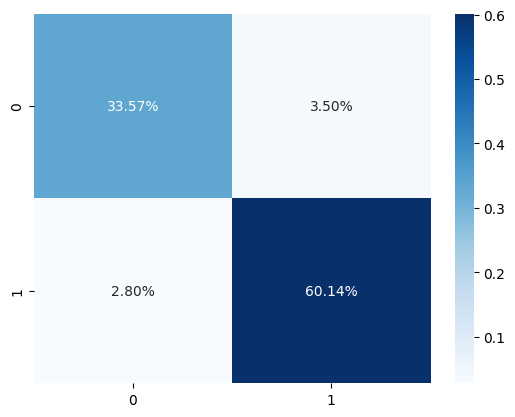

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

Better yet ...

<Axes: >

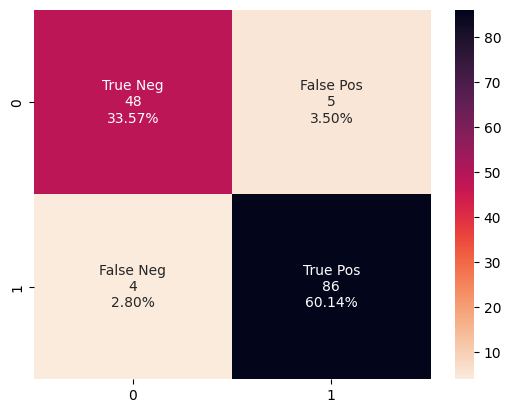

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='rocket_r')

Using the *confusion matrix*, we have

$$\mbox{Accuracy} = \frac{(TN + TP)}{(TN + FN + FP + TP)}$$

In [ ]:
#---get the accuracy of the prediction---
print("---Accuracy---")
print(log_regress.score(X = test_set ,
                        y = test_labels))

---Accuracy---
0.9370629370629371


Other metrics include

$$\textit{Precision} = \frac{TP}{(FP+TP)}$$

$$\textit{Recall} = \frac{TP}{(FN+TP)}$$

*Recall* is also known as the *True Positive Rate* (TPR).

$$\textit{F1 Score} = 2 \times \frac{(\textit{Precision} \times \textit{Recall})}{(\textit{Precision} + \textit{Recall})}$$

$$\textit{False Positive Rate} = \frac{FP}{(FP+TN)}$$

For additional information, check out: https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
# View summary of common classification metrics
print("--- Metrics ---")
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))

--- Metrics ---
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### Receiver Operating Characteristic (ROC) Curve

Another common metric used is the [*receiver operating characteristic*](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) (ROC) curve, which is based on information from the confusion matrix.

Specifically, a ROC curve is generated by plotting the *true positive rate* (TPR) against the *false positive rate* (FPR) at various threshold settings.

In [ ]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(test_set)
preds = probs[:,1] # Recall, 1=benign

In [ ]:
#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)

In [ ]:
print(fpr)

[0.         0.         0.         0.01886792 0.01886792 0.03773585
 0.03773585 0.05660377 0.05660377 0.0754717  0.0754717  0.13207547
 0.13207547 0.1509434  0.1509434  0.22641509 0.22641509 1.        ]


In [ ]:
print(tpr)

[0.         0.01111111 0.66666667 0.66666667 0.87777778 0.87777778
 0.91111111 0.91111111 0.93333333 0.93333333 0.95555556 0.95555556
 0.97777778 0.97777778 0.98888889 0.98888889 1.         1.        ]


In [ ]:
print(threshold)

[1.99994134e+00 9.99941343e-01 9.80318580e-01 9.80023033e-01
 9.16500787e-01 9.10783370e-01 8.65783824e-01 8.32888841e-01
 8.26512365e-01 7.69015321e-01 7.00476088e-01 2.94982814e-01
 2.59110519e-01 2.35098546e-01 7.66225978e-02 3.09814091e-02
 1.09414306e-02 1.71770685e-20]


### Plotting the ROC and Finding the Area Under the Curve (AUC)

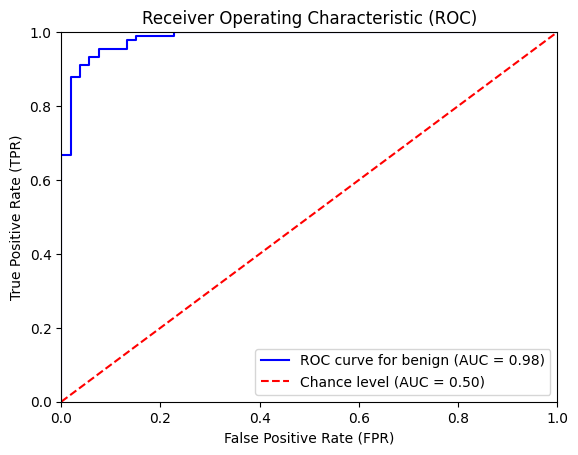

In [ ]:
#---find the area under the curve---
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'ROC curve for benign (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--', label = 'Chance level (AUC = 0.50)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In the ROC curve above, the red dashed line represents the performance of a purely random classifier. A good classifier will be as far from this line as possible!

## Using cross-validation

We will revisit training the model using one feature, `mean radius`, but this time we will incorporate <mark>*k*-fold cross validation</mark> to our solution.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()   # Load dataset
x = cancer.data[:,0]            # mean radius (first column)
y = cancer.target               # 0: malignant, 1: benign

### Method 1: Using [`LogisticRegressionCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.20,
    random_state=42
)

print('Training size:', len(X_train))
print('Testing  size:', len(X_test), end='\n\n')

k=10
model1 = LogisticRegressionCV(
    cv=k,
    random_state=42
)

#---train the model---
model1.fit(
    X = np.array(X_train).reshape(len(X_train),1),
    y = y_train
)

# Get the hyperparameters for this estimator
params = model1.get_params()
print('Model hyperparameters:', params)
print()

#---print trained model intercept---
print('Intercept:', model1.intercept_)

#---print trained model coefficients---
print('Coefficient(s):', model1.coef_)

Training size: 455
Testing  size: 114

Model hyperparameters: {'Cs': 10, 'class_weight': None, 'cv': 10, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}

Intercept: [13.81173579]
Coefficient(s): [[-0.93270968]]


The model equation for the model above is

$$Prob(x) = \frac{1}{1+e^{-(13.81-0.93{x})}}$$

where $x$ is the _mean radius_ and $Prob(x)$ is the probability that the mass is benign.


Now, let's evaluate the model ...

In [ ]:
X_test = X_test.reshape(-1,1)
preds = model1.predict(X=X_test)

from sklearn import metrics

#---view the confusion matrix---
cf_matrix=metrics.confusion_matrix(
    y_true = y_test,  # True labels
    y_pred = preds    # Predicted labels
)
print(cf_matrix)

[[36  7]
 [ 3 68]]


<Axes: >

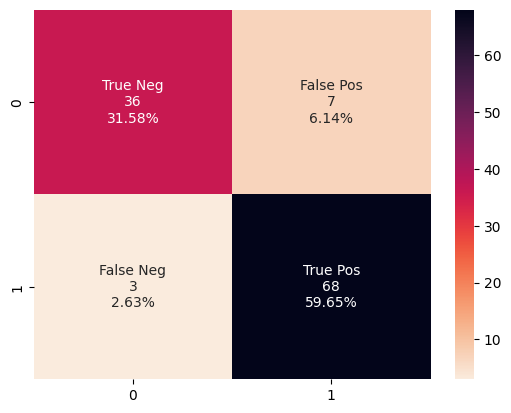

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='rocket_r')

In [ ]:
#---get the accuracy of the prediction---
print("---Accuracy---")
print(model1.score(
    X = X_test,
    y = y_test
    )
)

---Accuracy---
0.9122807017543859


In [ ]:
# View summary of common classification metrics
print("--- Metrics ---")
print(metrics.classification_report(
    y_true = y_test,
    y_pred = preds
    )
)

--- Metrics ---
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.91      0.96      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



### Method 2: Using [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

**Note:** This is a more general approach.

#### Single metric evaluation

This uses the default metric, mean accuracy (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)):

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model2 = LogisticRegression()

#---train the model---
k=10
cv_results = cross_validate(
    model2,
    X = np.array(x).reshape(len(x),1),
    y = y,
    cv=k,
    return_estimator=True,    # in order to get learned parameters
    return_train_score=True   # to compare training and validation scores
)

# Get the hyperparameters for this estimator
params = model2.get_params()
print('Model hyperparameters:', params)

Model hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Check out the training score
print('Training scores:\n', cv_results['train_score'])

Training scores:
 [0.88476562 0.890625   0.88671875 0.87695312 0.88085938 0.87890625
 0.87304688 0.875      0.87695312 0.87329435]


In [ ]:
# Check out the testing score
print('Validation scores:\n', cv_results['test_score'])

Validation scores:
 [0.85964912 0.78947368 0.80701754 0.89473684 0.87719298 0.87719298
 0.92982456 0.9122807  0.85964912 0.94642857]


In [ ]:
# Determine learned parameters, for reference ...
for i in range(k):
    print(f'Estimator #{i+1:2}:', cv_results['estimator'][i])
    print('   parameters: ', end='')
    print(cv_results['estimator'][i].intercept_, end=' ')
    print(cv_results['estimator'][i].coef_)

Estimator # 1: LogisticRegression()
   parameters: [15.41199369] [[-1.0390792]]
Estimator # 2: LogisticRegression()
   parameters: [16.06656993] [[-1.08548732]]
Estimator # 3: LogisticRegression()
   parameters: [15.01042271] [[-1.01521115]]
Estimator # 4: LogisticRegression()
   parameters: [15.11785807] [[-1.02218634]]
Estimator # 5: LogisticRegression()
   parameters: [14.78280228] [[-0.99829374]]
Estimator # 6: LogisticRegression()
   parameters: [15.17492847] [[-1.032292]]
Estimator # 7: LogisticRegression()
   parameters: [14.8724502] [[-1.00881633]]
Estimator # 8: LogisticRegression()
   parameters: [14.86525608] [[-1.01115564]]
Estimator # 9: LogisticRegression()
   parameters: [15.33049412] [[-1.04795903]]
Estimator #10: LogisticRegression()
   parameters: [14.70381988] [[-0.99567517]]


#### Multiple metric evaluation

The user can specify multiple metrics to use for model evaluation (see the `scoring` parameter documentation for additional information):

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression()

#---train the model---
cv_results = cross_validate(
    model,
    X = np.array(x).reshape(len(x),1),
    y = y,
    cv=10,
    scoring=(
        'accuracy',
        'precision',
        'r2',
        'neg_mean_squared_error',
        'roc_auc'
    ),
    return_estimator=True,    # in order to get learned parameters
    return_train_score=True   # to compare training and validation scores
)

# Get the parameters for this estimator
params = model.get_params()
print('Model parameters:', params)

Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Check out the training scores
print('Training Scores', end='\n\n')
print('Accuracy:\n', cv_results['train_accuracy'])
print('Precision:\n', cv_results['train_precision'])
print('r2:\n', cv_results['train_r2'])
print('-MSE:\n', cv_results['train_neg_mean_squared_error'])
print('roc_auc:\n', cv_results['train_roc_auc'])

Training Scores

Accuracy:
 [0.88476562 0.890625   0.88671875 0.87695312 0.88085938 0.87890625
 0.87304688 0.875      0.87695312 0.87329435]
Precision:
 [0.8879056  0.89117647 0.8856305  0.87941176 0.88235294 0.8797654
 0.87426901 0.87683284 0.87719298 0.87683284]
r2:
 [0.50624387 0.53135011 0.51564972 0.47389539 0.49059712 0.48224625
 0.45719365 0.46554452 0.47389539 0.45782251]
-MSE:
 [-0.11523438 -0.109375   -0.11328125 -0.12304688 -0.11914062 -0.12109375
 -0.12695312 -0.125      -0.12304688 -0.12670565]
roc_auc:
 [0.94160673 0.94559497 0.9360229  0.93966009 0.93719724 0.93546835
 0.93413091 0.93670793 0.93694443 0.93220546]


In [ ]:
# Check out the validation scores
print('Validation Scores', end='\n\n')
print('Accuracy:\n', cv_results['test_accuracy'])
print('Precision:\n', cv_results['test_precision'])
print('r2:\n', cv_results['test_r2'])
print('-MSE:\n', cv_results['test_neg_mean_squared_error'])
print('roc_auc:\n', cv_results['test_roc_auc'])

Validation Scores

Accuracy:
 [0.85964912 0.78947368 0.80701754 0.89473684 0.87719298 0.87719298
 0.92982456 0.9122807  0.85964912 0.94642857]
Precision:
 [0.81395349 0.7804878  0.82051282 0.875      0.85365854 0.91428571
 0.94444444 0.94285714 0.96666667 0.92105263]
r2:
 [0.40779221 0.11168831 0.17063492 0.54761905 0.47222222 0.47222222
 0.6984127  0.62301587 0.3968254  0.77142857]
-MSE:
 [-0.14035088 -0.21052632 -0.19298246 -0.10526316 -0.12280702 -0.12280702
 -0.07017544 -0.0877193  -0.14035088 -0.05357143]
roc_auc:
 [0.90909091 0.87532468 0.94444444 0.91402116 0.94246032 0.96164021
 0.96164021 0.95767196 0.96296296 0.9755102 ]


In [ ]:
# Determine learned parameters, for reference ...
for i in range(k):
    print(f'Estimator #{i+1:2}:', cv_results['estimator'][i])
    print('   parameters: ', end='')
    print(cv_results['estimator'][i].intercept_, end=' ')
    print(cv_results['estimator'][i].coef_)

Estimator # 1: LogisticRegression()
   parameters: [15.41199369] [[-1.0390792]]
Estimator # 2: LogisticRegression()
   parameters: [16.06656993] [[-1.08548732]]
Estimator # 3: LogisticRegression()
   parameters: [15.01042271] [[-1.01521115]]
Estimator # 4: LogisticRegression()
   parameters: [15.11785807] [[-1.02218634]]
Estimator # 5: LogisticRegression()
   parameters: [14.78280228] [[-0.99829374]]
Estimator # 6: LogisticRegression()
   parameters: [15.17492847] [[-1.032292]]
Estimator # 7: LogisticRegression()
   parameters: [14.8724502] [[-1.00881633]]
Estimator # 8: LogisticRegression()
   parameters: [14.86525608] [[-1.01115564]]
Estimator # 9: LogisticRegression()
   parameters: [15.33049412] [[-1.04795903]]
Estimator #10: LogisticRegression()
   parameters: [14.70381988] [[-0.99567517]]
